In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [3]:
import pyarrow
trafficjam = pd.read_parquet('C:/Users/Gebruiker/Documents/Data/ANWB_Data_23_02_2022/trafficJams', engine='pyarrow')
trafficjam

,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,15810707.0,2021-10-12 06:44:00,A1,a,780.0,11500.0,Amsterdam,Amersfoort,1.0,0.0,...,queing-traffic,None,None,None,A1,3000.0,2021-10-12 05:40:30,knp. Eemnes naar de A27 richting Almere,52.23165,5.23851
1,15813076.0,2021-10-12 06:44:00,A1,a,360.0,2300.0,Apeldoorn,Amersfoort,0.0,0.0,...,stationary-traffic,None,None,None,A1,3001.0,2021-10-12 04:57:30,Voorthuizen,52.16876,5.59499
2,15811852.0,2021-10-12 06:44:00,A1,a,840.0,8800.0,Apeldoorn,Amsterdam,0.0,0.0,...,stationary-traffic,None,None,None,A1,3000.0,2021-10-12 04:57:30,Hoevelaken,52.17043,5.43905
3,15812996.0,2021-10-12 06:44:00,A1,a,1680.0,19200.0,Amersfoort,Amsterdam,0.0,0.0,...,queing-traffic,None,None,None,A1,3000.0,2021-10-12 05:44:30,Muiden,52.32795,5.04860
4,15812533.0,2021-10-12 06:44:00,A1,a,180.0,3800.0,Amersfoort,Amsterdam,0.0,0.0,...,slow-traffic,None,None,None,A1,3000.0,2021-10-12 05:44:30,knp. Watergraafsmeer,52.35232,4.96319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278996,16415538.0,2022-01-02 20:34:00,A73,a,NaN,NaN,Maasbracht,Nijmegen,1.0,0.0,...,unknown,None,None,Liggen voorwerpen op de weg.,A73,3410.0,NaT,knp. Tiglia,51.34640,6.15775
1278997,16415538.0,2022-01-02 20:29:00,A73,a,NaN,NaN,Maasbracht,Nijmegen,1.0,0.0,...,unknown,None,None,Liggen voorwerpen op de weg.,A73,3410.0,NaT,knp. Tiglia,51.34640,6.15775
1278998,16414867.0,2022-01-02 03:44:00,A50,a,NaN,NaN,Eindhoven,Arnhem,1.0,0.0,...,unknown,None,None,Liggen voorwerpen op de weg.,A50,3340.0,NaT,Ravenstein,51.78808,5.65334
1278999,15383717.0,2021-08-25 04:09:00,A22,a,NaN,NaN,Beverwijk,Velsen,0.0,0.0,...,road-closed,closed,None,Wegwerkzaamheden. Dicht.,A22,3463.0,NaT,afrit IJmuiden,52.45310,4.65776


In [17]:
trafficjam['loaddatetimeutc'] = pd.to_datetime(trafficjam['loaddatetimeutc'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')
trafficjam

,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,15810707.0,2021-10-12 06:44:00,A1,a,780.0,11500.0,Amsterdam,Amersfoort,1.0,0.0,...,queing-traffic,None,None,None,A1,3000.0,2021-10-12 05:40:30,knp. Eemnes naar de A27 richting Almere,52.23165,5.23851
1,15813076.0,2021-10-12 06:44:00,A1,a,360.0,2300.0,Apeldoorn,Amersfoort,0.0,0.0,...,stationary-traffic,None,None,None,A1,3001.0,2021-10-12 04:57:30,Voorthuizen,52.16876,5.59499
2,15811852.0,2021-10-12 06:44:00,A1,a,840.0,8800.0,Apeldoorn,Amsterdam,0.0,0.0,...,stationary-traffic,None,None,None,A1,3000.0,2021-10-12 04:57:30,Hoevelaken,52.17043,5.43905
3,15812996.0,2021-10-12 06:44:00,A1,a,1680.0,19200.0,Amersfoort,Amsterdam,0.0,0.0,...,queing-traffic,None,None,None,A1,3000.0,2021-10-12 05:44:30,Muiden,52.32795,5.04860
4,15812533.0,2021-10-12 06:44:00,A1,a,180.0,3800.0,Amersfoort,Amsterdam,0.0,0.0,...,slow-traffic,None,None,None,A1,3000.0,2021-10-12 05:44:30,knp. Watergraafsmeer,52.35232,4.96319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278996,16415538.0,2022-01-02 20:34:00,A73,a,NaN,NaN,Maasbracht,Nijmegen,1.0,0.0,...,unknown,None,None,Liggen voorwerpen op de weg.,A73,3410.0,NaT,knp. Tiglia,51.34640,6.15775
1278997,16415538.0,2022-01-02 20:29:00,A73,a,NaN,NaN,Maasbracht,Nijmegen,1.0,0.0,...,unknown,None,None,Liggen voorwerpen op de weg.,A73,3410.0,NaT,knp. Tiglia,51.34640,6.15775
1278998,16414867.0,2022-01-02 03:44:00,A50,a,NaN,NaN,Eindhoven,Arnhem,1.0,0.0,...,unknown,None,None,Liggen voorwerpen op de weg.,A50,3340.0,NaT,Ravenstein,51.78808,5.65334
1278999,15383717.0,2021-08-25 04:09:00,A22,a,NaN,NaN,Beverwijk,Velsen,0.0,0.0,...,road-closed,closed,None,Wegwerkzaamheden. Dicht.,A22,3463.0,NaT,afrit IJmuiden,52.45310,4.65776


In [4]:
trafficjam.columns

Index(['jam_id', 'loaddatetimeutc', 'road', 'type', 'jam_delay',
       'jam_distance', 'segmentstart', 'segmentend', 'jam_codedirection',
       'jam_afrc', 'jam_category', 'jam_from', 'jam_fromloc_lat',
       'jam_fromloc_lon', 'jam_incidenttype', 'jam_label', 'jam_location',
       'jam_reason', 'jam_road', 'jam_segmentid', 'jam_start', 'jam_to',
       'jam_toloc_lat', 'jam_toloc_lon'],
      dtype='object')

In [5]:
trafficjam['type'].unique()

array(['a', 'n', 'other', None], dtype=object)

In [6]:
trafficjam['jam_afrc'].unique()

array([ 0.,  3.,  4.,  5., nan])

<AxesSubplot:xlabel='count', ylabel='jam_afrc'>

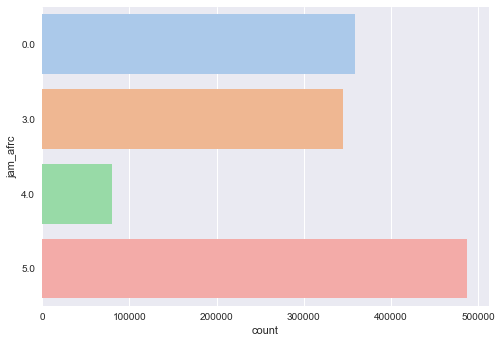

In [8]:
sns.countplot(y="jam_afrc", data=trafficjam,
            palette="pastel")

In [9]:
trafficjam['segmentstart'].unique()

array(['Amsterdam', 'Apeldoorn', 'Amersfoort', 'Maastricht', 'Eindhoven',
       "'s-Hertogenbosch", 'Utrecht', 'Rotterdam', 'Den Haag',
       'Heerenveen', 'Den Oever', 'Hoorn', 'Zaanstad', 'Alkmaar',
       'knp. Coenplein', 'Duitse grens', 'Arnhem', 'Nijmegen',
       'Belgische grens', 'Breda', 'Roosendaal', 'Varsseveld',
       'Hoek van Holland', 'Gouda', 'Almere', 'Gorinchem', 'Zwolle',
       'Groningen', 'Bergen op Zoom', 'Ede', 'Enschede', 'Almelo',
       'knp. Ridderkerk-Noord', 'Oss', 'Tilburg', 'knp. Zonzeel', 'Venlo',
       'Maasbracht', 'Helmond', 'Doesburg', 'de Duitse grens',
       'Den Helder', 'Leiden', 'Bodegraven', 'Leidschendam', 'Emmen',
       'Ommen', 'Emmeloord', 'Middelburg', 'Zierikzee', 'Neerpelt',
       'Zandvoort', 'Hilversum', 'Uithoorn', 'Hoofddorp', 'Zoetermeer',
       'Heemstede', 'Bergambacht', 'Alphen a/d Rijn', 'Sassenheim',
       'Haarlem', 'Hazerswoude', 'Schoonhoven', 'Delft', 'Westerlee',
       'Papendrecht', 'Spijkenisse', 'Dordrecht',

Allot of data on allot of cities, we should make the scope smaller.

ValueError: min() arg is an empty sequence

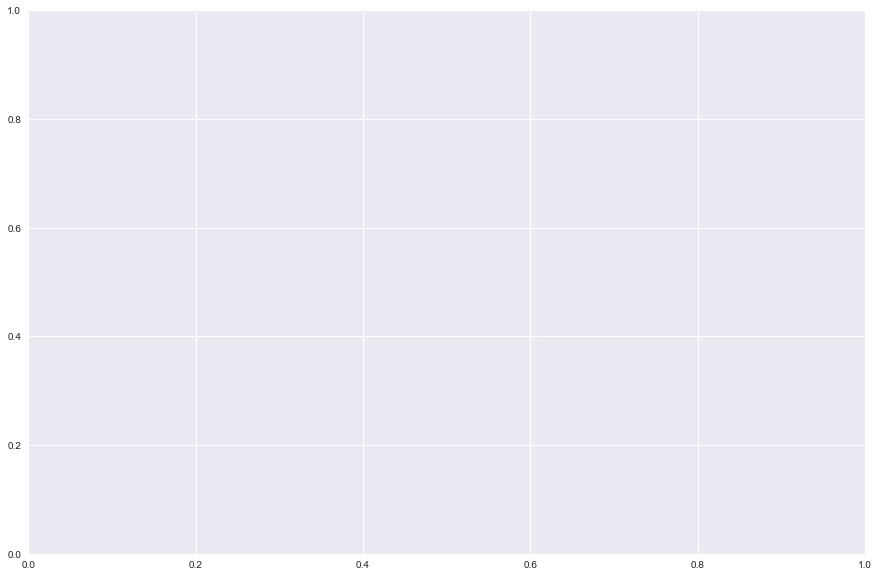

In [11]:
eind = trafficjam[trafficjam['segmentstart'] == 'Eindhoven']
eindhoven = eind[eind['segmentend'] == 'Eindhoven']
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="jam_incidenttype", data=eindhoven,
            palette="pastel")
plt.title('Incident type Eindhoven')

In [ ]:
eindhoven.info()

In [ ]:
trafficjam.isnull().count()

In [ ]:
trafficjam.dropna()

In [34]:
trafficjam['jam_incidenttype'].unique()

array(['queing-traffic', 'stationary-traffic', 'slow-traffic',
       'road-closed', 'unknown', 'diversion', None, 'roadwork'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='jam_incidenttype'>

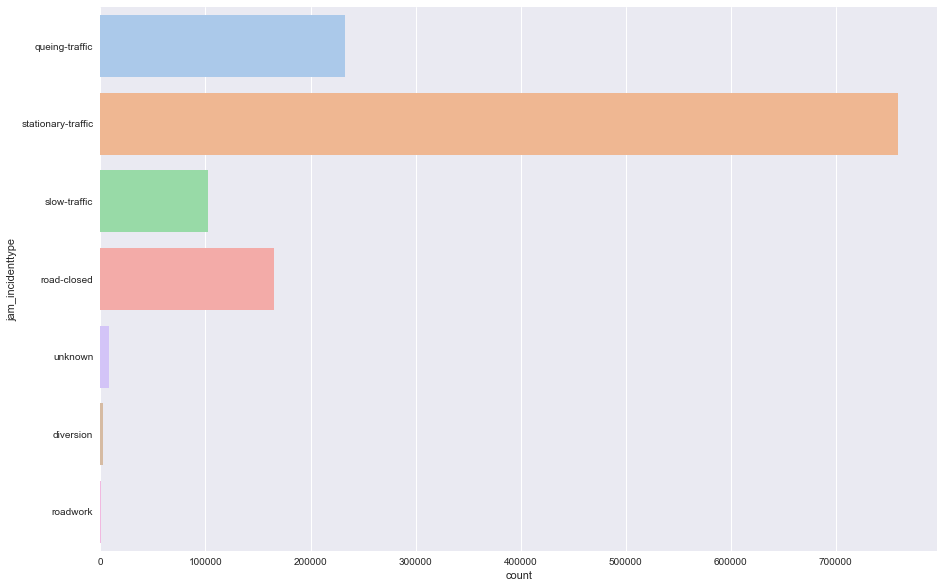

In [35]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="jam_incidenttype", data=trafficjam,
            palette="pastel")

Above table shows, that roadworks does not cause traffic jams, so we dont need to look at this table

<AxesSubplot:xlabel='count', ylabel='segmentstart'>

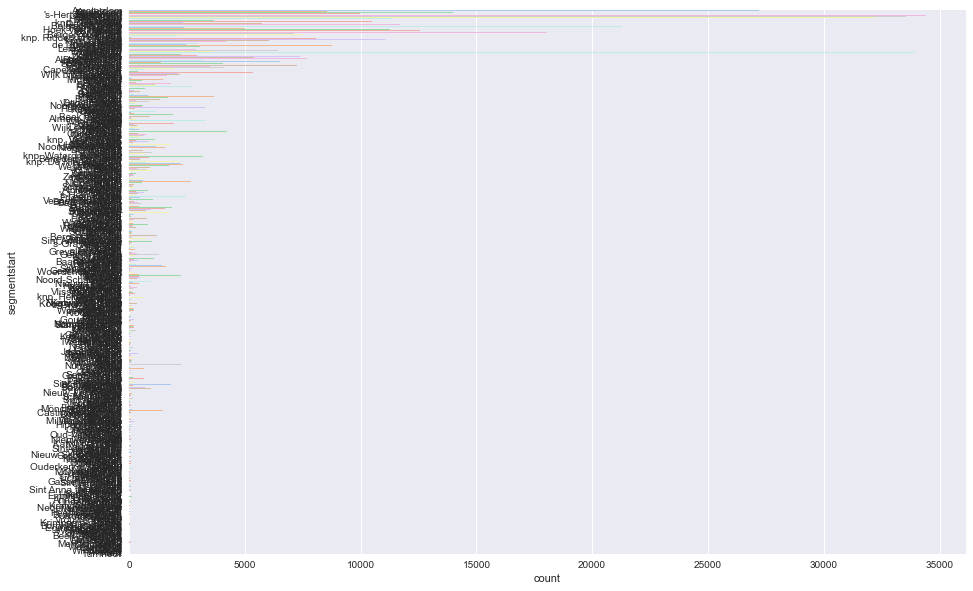

In [36]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="segmentstart", data=trafficjam,
            palette="pastel")